Ans. to the Ques. no 1

In [31]:
#importing libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd 

#setting directory
import os
os.chdir(r'E:/content/drive/MyDrive')

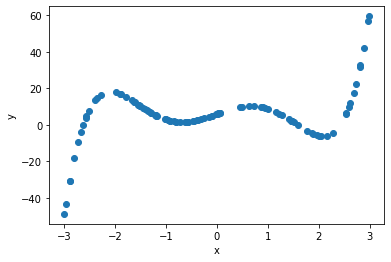

In [32]:
#Loading train data
X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
# Plotting the x variable and target from training set
plt.scatter(X_train,y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
#Loading test data
#Since test dataset is supposed to be unseen, I am not plotting them
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

The relationship between x and y is not linear. We need feature engineering to add non-linearity. We can use basis function for feature engineering.
#Looking at the various plots of different powers of x in google and in the lecture slide, I think x^3 and x^5 matches with the above plot of relation between x and y from training data.

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 1)
(100,)
(100, 1)
(100, 1)


[ 4.69016032 -8.68625958  2.12179436]


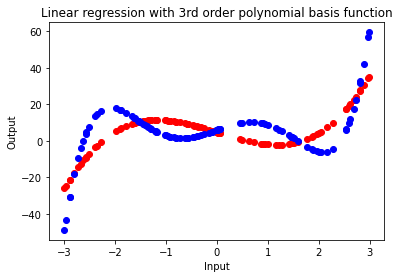

Least square error for linear regression with x^3: 320.67511496033154


In [34]:
#Model building with x and x^3

#Creating and adding bias with the same shape of X_train    
bias=np.ones((100,1))
X1_train=np.append(bias,X_train,axis=1)

#Creating and adding polinomial
X_train_cube=(X_train**3).reshape(100,1)
X3_train=np.reshape(X1_train,(100,2))
#adding one more feature x^3
X3_train=np.append(X3_train,X_train_cube,axis=1)


#Calculating theta
theta = np.linalg.inv(X3_train.T.dot(X3_train)).dot(X3_train.T).dot(y_train)
print(theta)
#Calculating predicted values
y_predicted=np.matmul(X3_train,theta).reshape(100,1)

#Plotting X_train with y_predicted and y_train
plt.plot(X_train, y_predicted, 'ro',label='1')
plt.plot(X_train, y_train, 'bo',label='4')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear regression with 3rd order polynomial basis function')
plt.show()

mse = (np.square(y_train - y_predicted)).mean()
print("Least square error for linear regression with x^3: "+str(mse))

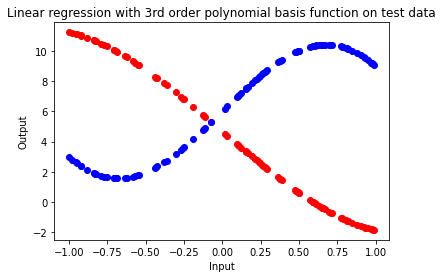

Least square error for linear regression with x^3 model on test data: 70.69707189480987


In [35]:
#Verifying with test data
x_test_cube =(X_test**3).reshape(100,1)
x3_test = np.c_[np.ones((len(X_test),1)),X_test]
x3_test=np.reshape(x3_test,(100,2))
x3_test=np.append(x3_test,x_test_cube, axis=1)

y_predicted=np.matmul(x3_test,theta).reshape(100,1)
plt.plot(X_test, y_predicted, 'ro',label='1')
plt.plot(X_test, y_test, 'bo',label='4')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear regression with 3rd order polynomial basis function on test data')
plt.show()

mse = (np.square(y_test - y_predicted)).mean()
print("Least square error for linear regression with x^3 model on test data: "+str(mse))

[[ 6.]
 [10.]
 [-8.]
 [ 1.]]


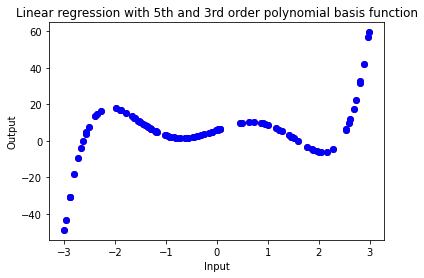

Least square error for linear regression with x^5 and x^3: 1.7623405058127074e-26


In [36]:
#Model building with x, x^3 and x^5

X_train_five=(X_train**5).reshape(100,1)
X5_train=np.reshape(X3_train,(100,3))
#adding one more feature
X5_train=np.append(X5_train,X_train_five,axis=1)

y_train=np.reshape(y_train,(100,1))

#Calculating theta
theta = np.linalg.inv(X5_train.T.dot(X5_train)).dot(X5_train.T).dot(y_train)
print(theta)
#Calculating predicted values
y_predicted=np.matmul(X5_train,theta).reshape(100,1)

#Plotting X_train with y_predicted and y_train
plt.plot(X_train, y_predicted, 'ro',label='1')
plt.plot(X_train, y_train, 'bo',label='4')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear regression with 5th and 3rd order polynomial basis function')
plt.show()

mse = (np.square(y_train - y_predicted)).sum()/100
print("Least square error for linear regression with x^5 and x^3: "+str(mse))

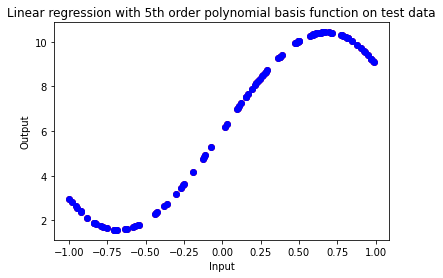

Least square error for linear regression with x^5 model on test data: 4.393128910282817e-27


In [37]:
#Verifying with test data

x_test_five =(X_test**5).reshape(100,1)
x5_test = np.c_[np.ones((len(X_test),1)),X_test,X_test**3]
x5_test=np.reshape(x5_test,(100,3))
x5_test=np.append(x5_test,x_test_five,axis=1)

y_predicted=np.matmul(x5_test,theta).reshape(100,1)
plt.plot(X_test, y_predicted, 'ro',label='1')
plt.plot(X_test, y_test, 'bo',label='4')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear regression with 5th order polynomial basis function on test data')
plt.show()

mse4 = (np.square(y_test - y_predicted)).sum()/100
print("Least square error for linear regression with x^5 model on test data: "+str(mse4))

Ans. to the Ques. no 2

In [38]:
#Reading data
house_data=pd.read_csv(r'Assignment1_Q2_Data.csv')
house_data.head()

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


In [39]:
print(house_data.shape)

(28, 13)


In [40]:
#70-30 training testing split using pandas
train=house_data.sample(frac=0.7, random_state=12345)
test=house_data.drop(train.index)
#Number of records in each set
len(train)
len(test)


8

In [41]:
#Since there are 13 columns where 1st column is ID and last column is target variable
x_train=train.iloc[:,1:12].values
y_train=train.iloc[:,12].values

print(x_train.shape)
print(y_train.shape)

(20, 11)
(20,)


In [42]:
bias=np.ones((20,1))

x_train_b = np.c_[bias,x_train]
print(x_train_b.shape)

theta = np.linalg.inv(x_train_b.T.dot(x_train_b)).dot(x_train_b.T).dot(y_train)
print(theta)

(20, 12)
[13.64445191  2.96302702 -0.22724832 -0.09635988 10.87058122  2.04915075
 -1.70999684 -0.16870645 -0.17845892  1.08006051 -0.41473382  4.2851517 ]


(20,)


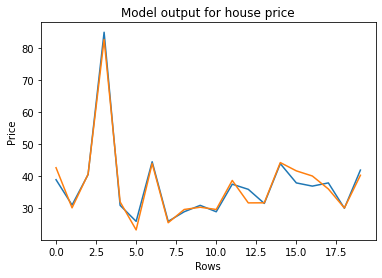

Least square error for normal linear regression to predict house price 3.9826793613183646


In [43]:
y_predicted=np.matmul(x_train_b,theta)
print(y_predicted.shape)

#There are 20 records in training set. So for ploting y_predicted by rows:
x_org=np.arange(0,20,1)

plt.plot(x_org,y_train,label='input')
plt.plot(x_org,y_predicted,label='prediction')
plt.xlabel('Rows')
plt.ylabel('Price')
plt.title('Model output for house price')
plt.show()
least_error=(((y_predicted-y_train)**2).sum())/20
print("Least square error for normal linear regression to predict house price "+str(least_error))

In [44]:
#Applying model on test data
x_test=test.iloc[:,1:12].values
y_test=test.iloc[:,12].values

bias=np.ones((8,1))
y=np.reshape(y_test,(8,1))

x_test_b = np.c_[bias,x_test]

(8,)


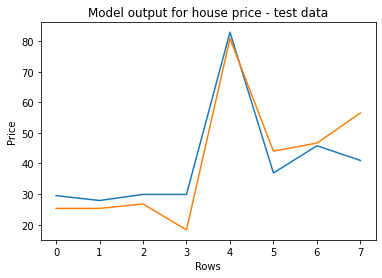

Least square error for normal linear regression to predict house price on test data 58.14610068283959


In [45]:
y_predicted=np.matmul(x_test_b,theta)
print(y_predicted.shape)
#There are 8 records in test set. So for to plot y_predicted by rows:
x_org=np.arange(0,8,1)

plt.plot(x_org,y_test,label='input')
plt.plot(x_org,y_predicted,label='prediction')
plt.xlabel('Rows')
plt.ylabel('Price')
plt.title('Model output for house price - test data')
plt.show()
least_error=(((y_predicted-y_test)**2).sum())/(8)
print("Least square error for normal linear regression to predict house price on test data "+str(least_error))

In [46]:
train.describe()

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
count,20.000000,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,14.950000,6.997805,1.250000,6.65309,1.50040,1.250000,6.600000,3.200000,36.950000,2.150000,1.200000,0.35000,37.230000
std,6.809243,2.590080,0.380443,2.04677,0.52043,0.697741,1.187656,0.695852,11.184929,1.268028,0.523148,0.48936,12.581277
min,1.000000,4.557300,1.000000,3.47200,0.97500,0.000000,5.000000,2.000000,17.000000,1.000000,1.000000,0.00000,25.900000
25%,10.500000,5.603900,1.000000,5.11250,1.23025,1.000000,6.000000,3.000000,30.000000,1.000000,1.000000,0.00000,30.675000
50%,15.500000,6.041250,1.000000,6.55050,1.49400,1.000000,6.000000,3.000000,36.000000,2.000000,1.000000,0.00000,36.400000
75%,20.250000,7.899675,1.500000,8.13750,1.65500,2.000000,7.000000,3.250000,46.500000,3.250000,1.000000,1.00000,39.300000
max,25.000000,16.420200,2.500000,9.89000,3.42000,2.000000,10.000000,5.000000,54.000000,4.000000,3.000000,1.00000,84.900000


In [47]:
print(theta)

[13.64445191  2.96302702 -0.22724832 -0.09635988 10.87058122  2.04915075
 -1.70999684 -0.16870645 -0.17845892  1.08006051 -0.41473382  4.2851517 ]


In [48]:
#standardized coefficient calculation
#There are 11 features, and 12 theta values. 1st theta value is for bias. So, I will start from 2nd theta value
local_price_sc = 2.96302702*(6.809243/12.581277)
bath_sc = -0.22724832*(2.590080/12.581277)
landarea_sc = -0.09635988*(2.04677/12.581277)
living_area_sc = 10.87058122*(0.52043/12.581277)
garages_sc = 2.04915075*(0.697741/12.581277)
room_sc = -1.70999684*(1.187656/12.581277)
bedroom_sc = -0.16870645*(0.695852/12.581277)
age_sc = -0.17845892*(11.184929/12.581277)
contype_sc = 1.08006051*(1.268028/12.581277)
archtype_sc = -0.41473382*(0.523148/12.581277)
fireplace_sc = 4.2851517*(0.48936/12.581277)

In [49]:
#Printing standardized coefficient of the features
print(local_price_sc)
print(bath_sc)
print(landarea_sc)
print(living_area_sc)
print(garages_sc)
print(room_sc)
print(bedroom_sc)
print(age_sc)
print(contype_sc)
print(archtype_sc)
print(fireplace_sc)

1.6036504875256987
-0.04678311499425694
-0.01567619181960623
0.4496663243583779
0.11364319325103087
-0.16142145244930542
-0.009330906603948074
-0.15865244439150972
0.10885595861010611
-0.017245242153507943
0.16667480065115806


In [50]:
#So, local_price (2nd column in dataset out of 13) is the most important and number of bedroom (8th column in dataset out of 13) is the least important variable

#Using only most important variable
x_train=train.iloc[:,1].values
y_train=train.iloc[:,12].values
print(x_train.shape)
print(y_train.shape)

(20,)
(20,)


In [51]:
bias=np.ones((20,1))

x_train_b = np.c_[np.ones((20,1)),x_train]
#print(x_train_b)

theta = np.linalg.inv(x_train_b.T.dot(x_train_b)).dot(x_train_b.T).dot(y_train)
print(theta)

[4.49631618 4.67770734]


(20, 2)
(2,)
(20,)


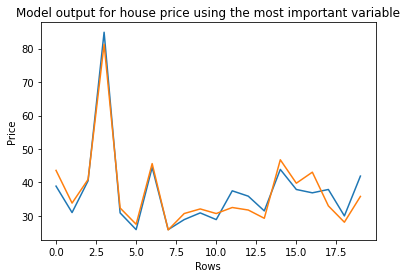

Least square error for normal linear regression to predict house price using the most important variable- Local Price 10.924897268773622


In [52]:
y_predicted=np.matmul(x_train_b,theta)
print(x_train_b.shape)
print(theta.shape)
print(y_predicted.shape)

#There are 20 records in training set. So for ploting y_predicted by rows:
x_org=np.arange(0,20,1)

plt.plot(x_org,y_train,label='input')
plt.plot(x_org,y_predicted,label='prediction')
plt.xlabel('Rows')
plt.ylabel('Price')
plt.title('Model output for house price using the most important variable')
plt.show()
least_error=(((y_predicted-y_train)**2).sum())/(20)
print("Least square error for normal linear regression to predict house price using the most important variable- Local Price "+str(least_error))

(8,)


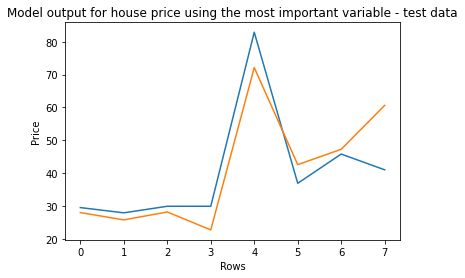

Least square error for normal linear regression to predict house price on test data using the most important variable- Local Price 74.6643710096758


In [53]:
#Applying model on test data
x_test=test.iloc[:,1].values
y_test=test.iloc[:,12].values

bias=np.ones((8,1))
x_test_b = np.c_[np.ones((8,1)),x_test]

y_predicted=np.matmul(x_test_b,theta)
print(y_predicted.shape)
#There are 8 records in test set. So for to plot y_predicted by rows:
x_org=np.arange(0,8,1)

plt.plot(x_org,y_test,label='input')
plt.plot(x_org,y_predicted,label='prediction')
plt.xlabel('Rows')
plt.ylabel('Price')
plt.title('Model output for house price using the most important variable - test data')
plt.show()
least_error=(((y_predicted-y_test)**2).sum())/(8)
print("Least square error for normal linear regression to predict house price on test data using the most important variable- Local Price "+str(least_error))

In [54]:
#Dropping only least important variable
x_train = train.iloc[:,1:12]
x_train.drop(x_train.columns[7],axis=1,inplace=True)
x_train=x_train.values
print(x_train.shape)
print(y_train.shape)

(20, 10)
(20,)


In [55]:
bias=np.ones((20,1))

x_train_b = np.c_[np.ones((20,1)),x_train]
#print(x_train_b)

theta = np.linalg.inv(x_train_b.T.dot(x_train_b)).dot(x_train_b.T).dot(y_train)
print(theta)

[11.44200891  3.3748815   3.01240189 -0.06640142  8.66552005  2.00713822
 -3.27373398  0.58386579  0.36340142  0.874008    3.55709366]


(20, 11)
(11,)
(20,)


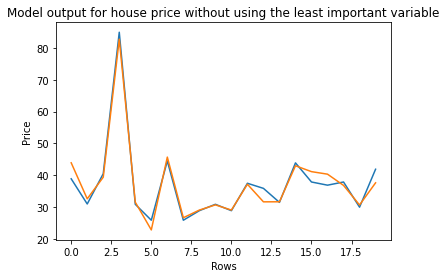

Least square error for normal linear regression to predict house price without using the least important variable 5.33576904180155


In [56]:
y_predicted=np.matmul(x_train_b,theta)
print(x_train_b.shape)
print(theta.shape)
print(y_predicted.shape)

#There are 20 records in training set. So for ploting y_predicted by rows:
x_org=np.arange(0,20,1)

plt.plot(x_org,y_train,label='input')
plt.plot(x_org,y_predicted,label='prediction')
plt.xlabel('Rows')
plt.ylabel('Price')
plt.title('Model output for house price without using the least important variable')
plt.show()
least_error=(((y_predicted-y_train)**2).sum())/(20)
print("Least square error for normal linear regression to predict house price without using the least important variable "+str(least_error))

(8,)


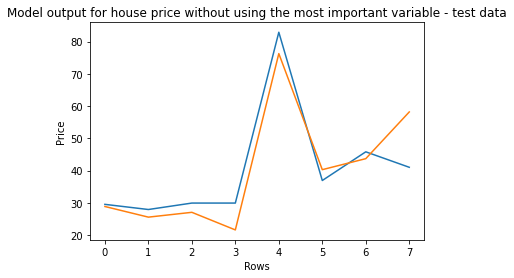

Least square error for normal linear regression to predict house price on test data without using the least important variable- Number of bedrooms 54.77931557820006


In [57]:
#Applying model on test data
x_test = test.iloc[:,1:12]
x_test.drop(x_test.columns[7],axis=1,inplace=True)
x_test=x_test.values

y_test=test.iloc[:,12].values

bias=np.ones((8,1))
x_test_b = np.c_[np.ones((8,1)),x_test]

y_predicted=np.matmul(x_test_b,theta)
print(y_predicted.shape)
#There are 8 records in test set. So for to plot y_predicted by rows:
x_org=np.arange(0,8,1)

plt.plot(x_org,y_test,label='input')
plt.plot(x_org,y_predicted,label='prediction')
plt.xlabel('Rows')
plt.ylabel('Price')
plt.title('Model output for house price without using the most important variable - test data')
plt.show()
least_error=(((y_predicted-y_test)**2).mean())
print("Least square error for normal linear regression to predict house price on test data without using the least important variable- Number of bedrooms "+str(least_error))

Ans. to the Ques. no 3

In [58]:
#Loading dataset
X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 1)
(100,)
(100, 1)
(100, 1)


In [59]:
x=X_train.reshape(100,1)
y=y_train.reshape(100,1)
#assign bandwith
bdw=0.01
local_predict_y=np.zeros(100)

#initialize weighted matrix with 1 in diagonal postion 
weight=np.array(np.eye(100),dtype=float)
for i in range(100):
    inval=x[i]
    for j in range(100):
        w=inval-x[j]
        #calculating w^(i) and converting the matrix into scalar value
        weight[j][j]=np.sum(np.exp((w**2)/(-2*bdw**2)))
    #calculate theta for every input value
    thetalocal=((np.linalg.inv((x.T.dot(weight)).dot(x)).dot(x.T)).dot(weight)).dot(y)
    #get the output using localy theta
    local_predict_y[i]=(x[i].dot(thetalocal))


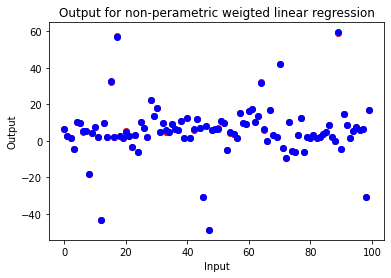

Least square error for locally weighted regression model: 0.03697941919772857


In [60]:
#plot data
local_predict_y=local_predict_y.reshape(100,1)
#Since there are 100 records:
x_org=np.arange(0,100,1)

plt.plot(x_org, local_predict_y, 'ro', label='1')
plt.plot(x_org, y, 'bo', label='4')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Output for non-perametric weigted linear regression')
plt.show()
#calculate least square error
least_error_local=(((local_predict_y-y)**2).sum())/(100)
print("Least square error for locally weighted regression model: "+str(least_error_local))